In [42]:
import os
import imageio
import pyspark
import numpy as np
from skimage import color
from matplotlib import pyplot as plt
%matplotlib inline

In [120]:
sc = pyspark.SparkContext().getOrCreate()

In [83]:
# ! mkdir LEGO_colored
# ! mkdir LEGO_colored/train
# ! mkdir LEGO_colored/valid

# os.makedirs("LEGO_colored")
# os.makedirs("LEGO_colored/train")
# os.makedirs("LEGO_colored/valid")
# for data_type in data_types:
#     for cat in categories_new:
#         for color in multipliers.keys():
#             os.makedirs("LEGO_colored/{}/{}_{}".format(data_type, color, cat))

In [121]:
categories = [i for i in os.listdir("LEGO_orig_images/train") if "ipynb" not in i]
categories_new = [c.replace(" ", "_") for c in categories]
multipliers = {'red': [1, 0, 0, 1],
               'blue': [0.3, 0.5, 0.9, 1],
               "green": [0, 0.8, 0.2, 1],
               "gray": [1, 1, 1, 1],
               "purple": [0.7, 0, 0.8, 1]
               }
multipliers_brct = sc.broadcast(multipliers)
data_types = ['train', 'valid']

In [118]:
to_spark = []#[data_type, color, cat, filenames]
for data_type in data_types:
    for color in multipliers.keys():
        for cat in categories:
            for filename in os.listdir("LEGO_orig_images/{}/{}".format(data_type, cat)):
                try:
                    to_spark.append([data_type, color, cat, filename])
                except:
                    print("couldn't get LEGO_orig_images/{}/{}/{}".format(data_type, cat, filename))

In [124]:
def change_color(img, multiplier):
    colored = multiplier * img
    return colored.astype(np.uint8)

def save_colored_image(data_type, color, category_old, filename):
    orig_img = imageio.imread("LEGO_orig_images/{}/{}/{}".format(data_type, category_old, filename))
    colored_img = change_color(orig_img, multipliers_brct.value[color])
    imageio.imsave("LEGO_colored/{}/{}_{}/{}".format(data_type, color, category_old.replace(" ", "_"), filename), colored_img)

In [125]:
sc.parallelize(to_spark).map(lambda row: save_colored_image(row[0], row[1], row[2], row[3])).collect()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [126]:
import random

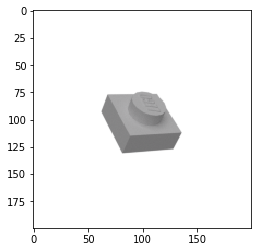

In [139]:
data_type, color, cat, filename = random.choice(to_spark)
plt.imshow(imageio.imread("LEGO_colored/{}/{}_{}/{}".format(data_type, color, cat.replace(" ", "_"), filename)))

In [143]:
data_type, color, cat, filename = random.choice(to_spark)
len(os.listdir("LEGO_colored/{}/{}_{}".format(data_type, color, cat.replace(" ", "_"))))

400

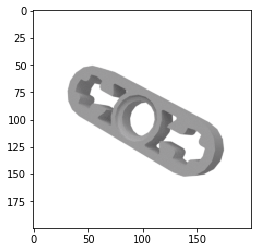

In [130]:
plt.imshow(imageio.imread("LEGO_colored/{}/{}_{}/{}".format(data_type, color, cat.replace(" ", "_"), filename)))

In [131]:
color

'gray'

In [92]:
category = categories_train[0]
data_type = "train"

image_filenames = os.listdir("LEGO_orig_images/{}/{}".format(data_type, category))
img = imageio.imread("LEGO_orig_images/{}/{}/{}".format(data_type, category, image_filenames[0]))
multiplier = [1, 0, 0, 1]

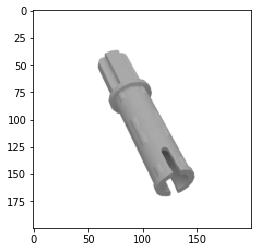

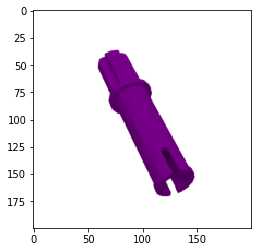

In [93]:
plt.imshow(img)
plt.figure()
plt.imshow(change_color(img, multipliers['exp1']))